In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns 

In [7]:
df=pd.read_csv(r"C:\Users\EDRICK I\OneDrive\Desktop\survey.csv")
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [11]:
df.columns
df.shape

(1259, 27)

In [14]:
df.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


In [26]:
df.dtypes

Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

In [28]:
df.nunique()

Timestamp                    1246
Age                            53
Gender                         49
Country                        48
state                          45
self_employed                   2
family_history                  2
treatment                       2
work_interfere                  4
no_employees                    6
remote_work                     2
tech_company                    2
benefits                        3
care_options                    3
wellness_program                3
seek_help                       3
anonymity                       3
leave                           5
mental_health_consequence       3
phys_health_consequence         3
coworkers                       3
supervisor                      3
mental_health_interview         3
phys_health_interview           3
mental_vs_physical              3
obs_consequence                 2
comments                      160
dtype: int64

In [30]:
df.describe(include=[object])     # for strings

,Timestamp,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
count,1259,1259,1259,744,1241,1259,1259,995,1259,1259,...,1259,1259,1259,1259,1259,1259,1259,1259,1259,164
unique,1246,49,48,45,2,2,2,4,6,2,...,5,3,3,3,3,3,3,3,2,160
top,2014-08-27 12:44:51,Male,United States,CA,No,No,Yes,Sometimes,6-25,No,...,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No,* Small family business - YMMV.
freq,2,615,751,138,1095,767,637,465,290,883,...,563,490,925,774,516,1008,557,576,1075,5


In [36]:
df.rename(columns={'Timestamp':'TIMESTAMP','Age':'AGE','Gender':'GENDER','Country':'COUNTRY','State':'STATE','self_employed': 'SELF EMPLOYED',
       'family_history':'FAMILY HISTORY','treatment':'TREATMENT','work_interfere':'WORK INTERFERE','no_employees':'NO EMPLOYEES',
       'remote_work':'REMOTE WORK','tech_company':'TECH COMPANY','benefits':'BENEFITS','care_options':'CARE OPTIONS',
       'wellness_program':'WELLNESS PROGRAM','seek_help':'SEEK HELP','anonymity':'ANONYMITY','leave':'LEAVE',
       'mental_health_consequence':'MENTAL HEALTH CONSEQUENCE','phys_health_consequence':'PHYS HEALTH CONSEQUENCE','coworkers':'COWORKERS',
       'supervisor':'SUPERVISOR','mental_health_interview':'MENTAL HEALTH INTERVIEW','phys_health_interview':'PHYS HEALTH INTERVIEW',
       'mental_vs_physical':'MENTAL VS PHYSICAL','obs_consequence':'OBS CONSEQUENCE','comments':'COMMENTS'})

,TIMESTAMP,AGE,GENDER,COUNTRY,state,SELF EMPLOYED,FAMILY HISTORY,TREATMENT,WORK INTERFERE,NO EMPLOYEES,...,LEAVE,MENTAL HEALTH CONSEQUENCE,PHYS HEALTH CONSEQUENCE,COWORKERS,SUPERVISOR,MENTAL HEALTH INTERVIEW,PHYS HEALTH INTERVIEW,MENTAL VS PHYSICAL,OBS CONSEQUENCE,COMMENTS
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [38]:
df.loc[df.duplicated()]

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments


In [40]:
df.loc[df.duplicated(subset=['self_employed'])].head(50)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
7,2014-08-27 11:32:05,39,M,Canada,NaN,NaN,No,No,Never,1-5,...,Don't know,No,No,No,No,No,No,No,No,NaN
8,2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
9,2014-08-27 11:32:43,23,Male,Canada,NaN,NaN,No,No,Never,26-100,...,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN
10,2014-08-27 11:32:44,31,Male,United States,OH,NaN,No,Yes,Sometimes,6-25,...,Don't know,No,No,Some of them,Yes,No,No,Don't know,No,NaN


In [42]:
df[df.duplicated(keep=False)]

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments


Text(0, 0.5, 'count')

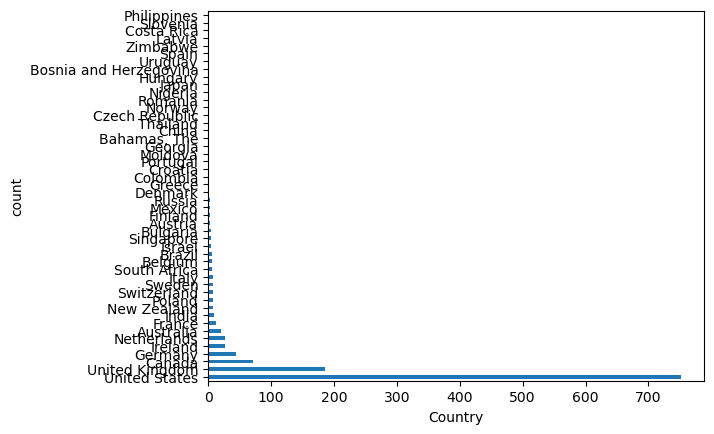

In [50]:
ax=df['Country'].value_counts().plot(kind='barh')
ax.set_xlabel('Country')
ax.set_ylabel('count')

Text(0, 0.5, 'count')

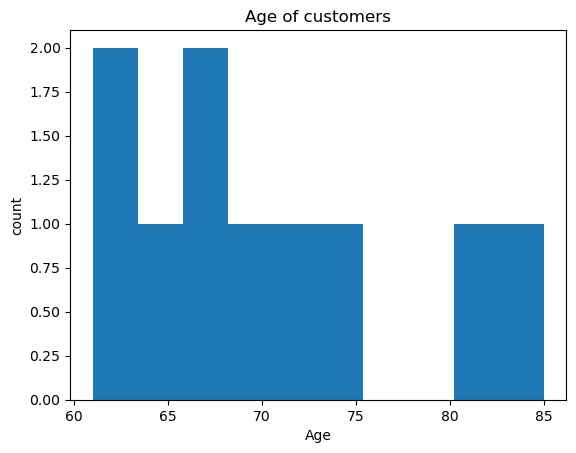

In [52]:
ax=df['Age'].value_counts().head(10).plot(kind='hist',title='Age of customers')
ax.set_xlabel('Age')
ax.set_ylabel('count')

<Axes: title={'center': 'LEAVE'}, ylabel='count'>

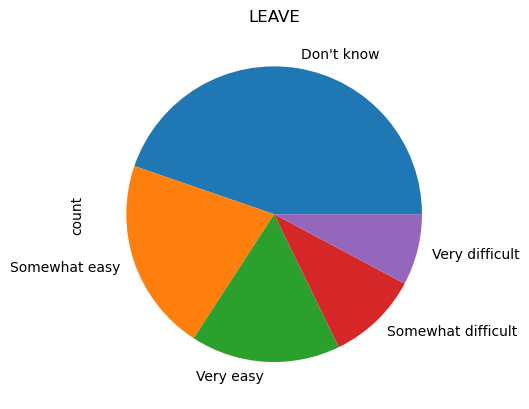

In [68]:
df['leave'].value_counts().plot(kind='pie',title='LEAVE')

Text(0, 0.5, 'count')

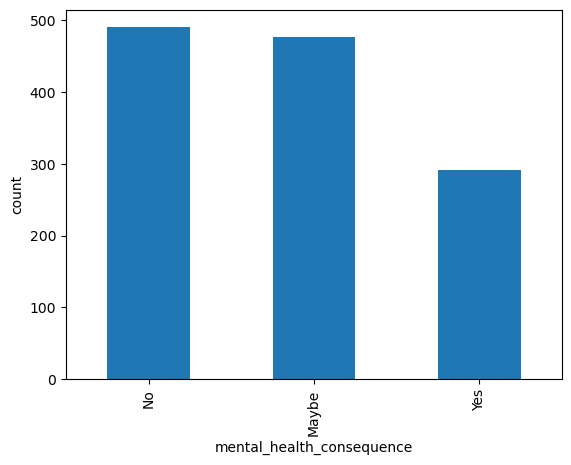

In [70]:
ax=df['mental_health_consequence'].value_counts().plot(kind='bar')
ax.set_xlabel('mental_health_consequence')
ax.set_ylabel('count')

Text(0, 0.5, 'count')

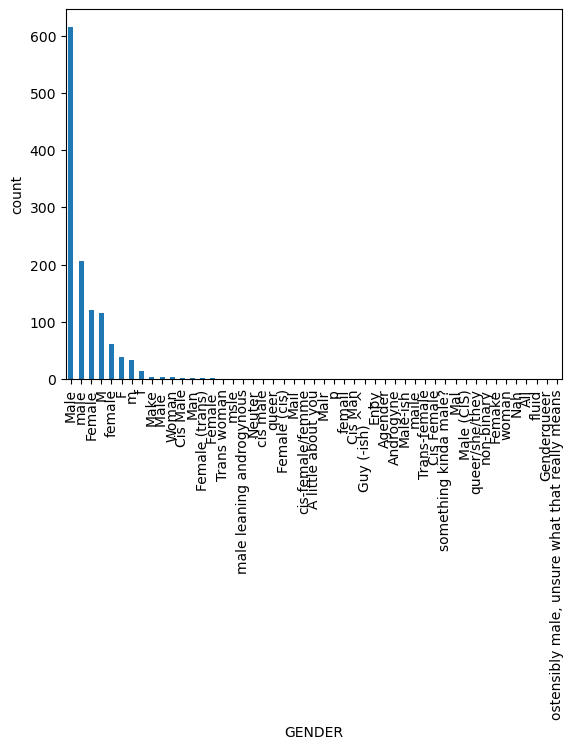

In [80]:
ax=df['Gender'].value_counts().plot(kind='bar')
ax.set_xlabel('GENDER')
ax.set_ylabel('count')

Text(0, 0.5, 'count')

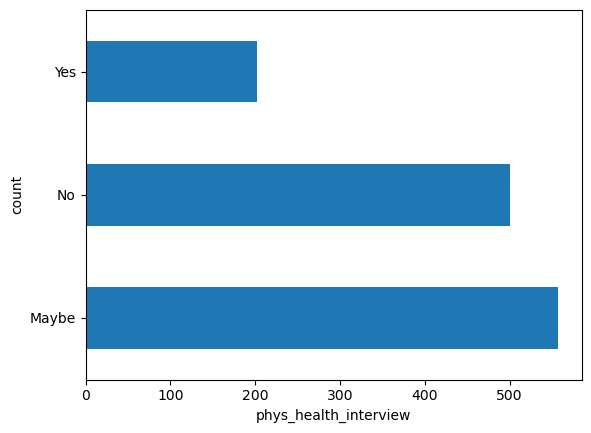

In [74]:
ax=df['phys_health_interview'].value_counts().plot(kind='barh')
ax.set_xlabel('phys_health_interview')
ax.set_ylabel('count')

Text(0, 0.5, 'count')

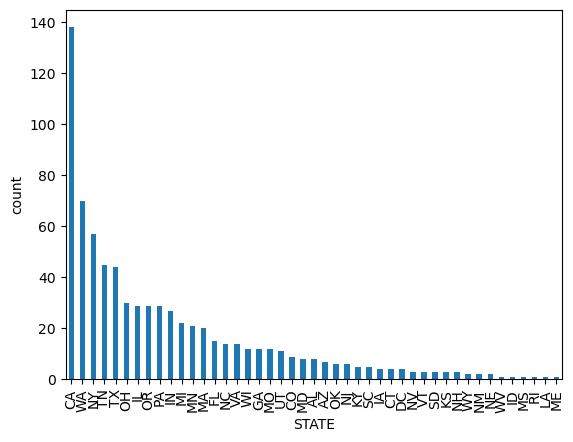

In [78]:
ax=df['state'].value_counts().plot(kind='bar')
ax.set_xlabel('STATE')
ax.set_ylabel('count')

<Axes: title={'center': 'supervisor'}, ylabel='count'>

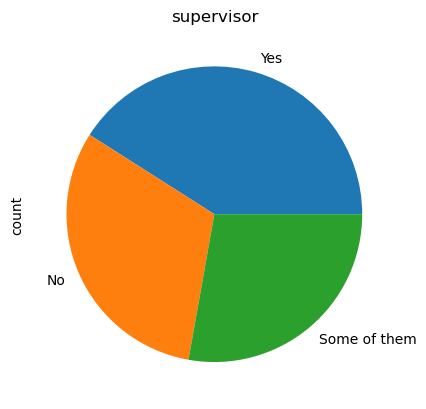

In [82]:
df['supervisor'].value_counts().plot(kind='pie',title='supervisor')


Text(0, 0.5, 'count')

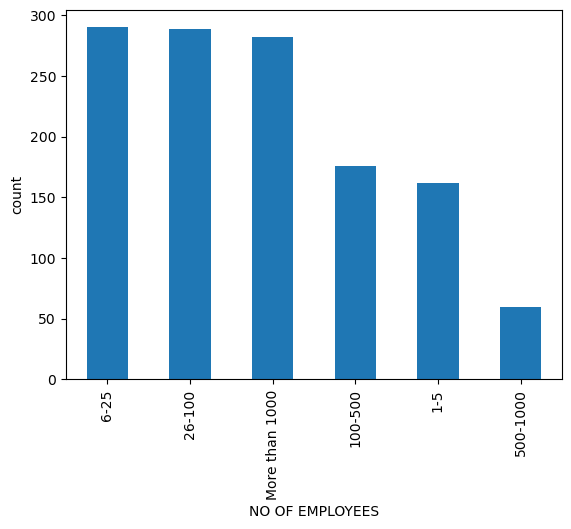

In [84]:
ax=df['no_employees'].value_counts().plot(kind='bar')
ax.set_xlabel('NO OF EMPLOYEES')
ax.set_ylabel('count')